# TS3 - Camila Belen Smith
## Modelizando un ADC

a. Generar el siguiente resultado producto de la experimentación. $B = 4 $ bits, $ k_n=1$

b. Analizar para una de las siguientes configuraciones $B =4, 8, 16 $ bits , $ k_n=1/10,1,10$ Discutir los resultados respecto a lo obtenido en a.


### Mis conclusiones de la tarea ejercicio 1

Lo que hicimos las últimas dos semanas de clases fue modelizar un ADC. La idea fue recrear la siguiente experiencia: a una señal $ x_n $ de entrada (*) muestreada como en la TS2, le adicionamos un ruido analógico.  

##### ¿Qué vendría a ser un ruido analógico?  
Este, según entiendo, es producto de interferencias en los circuitos (imperfecciones de los circuitos, etc.). En clase vimos el ejemplo de que, si le conectamos electrodos a una persona, esas señales son muy pequeñas y necesitan un amplificador. Ese amplificador, a su vez, genera este ruido analógico.  

El ruido analógico introducido en el sistema es **gaussiano (normal) e incorrelado**. Como las señales las trabajamos (es decir, las procesamos y analizamos) en computadoras, estas requieren digitalización. Para ello, usamos un **ADC**.  

Un ADC es un conversor que transforma una señal analógica (en nuestro caso sería $ s_n + n_n $ ) en una digital. Este proceso implica **cuantificar la amplitud** de la señal.  

En nuestro caso, tenemos una señal que va de $-A$ a $+A$. Nuestro ADC toma el rango $+-V_f$ y lo divide en $2^B$ espacios $ q $.  

A mí me sirve pensarlo como casilleros: cuando se muestrea, cada muestra "entra" en un casillero. Dependiendo del valor de $ q $ (que depende de $ B $), estos espacios pueden ser más grandes o más pequeños. Si los espacios son muy grandes, podemos pensar que se "pierde información" o que el error al digitalizar es mayor.  

Cuanto menor sea $ q $, más preciso será el proceso y menor será el error. Esto está relacionado con el valor de $ B $: a mayor cantidad de bits, menor será el error de digitalización.  

### Recapitulando  
1. Tengo mi señal original muestreada de la TS2.  
2. Le sumamos el ruido gaussiano.  
3. La digitalizamos.  
4. Al digitalizar, adquiere un ruido digital.  
5. Finalmente, obtenemos nuestra señal digitalizada con ambos ruidos.  

El objetivo es representar estas señales en **dB**, es decir, en potencia. En la experiencia, graficamos a partir de la **FFT** la señal digitalizada, además de los dos ruidos.  

También graficamos la potencia de la señal original y pudimos comprobar cómo **el piso de ruido de la señal se ve totalmente afectado**. Este se "eleva".  

En la primera experiencia (ejercicio **a**), las medias de los dos ruidos me dieron iguales, lo cual me parece coherente, considerando la siguiente línea de código:  

```python
pot_ruido_analog = pot_ruido_cuant * kn 
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)
```

(*) **Aclaración:** A la señal de entrada la normalizamos tal que su potencia sea 1 (En db seria ver el pico en cero). Aprendimos que la potencia de una señal es su varianza. Entonces para tener Varianza 1 podemos dividir nuestra señal por su desvio estandar. (En el caso de que la señal no tenga media cero, primero hay que restarle la media). En resumen se hace una normalizacion Z-score

(**) **Aclaración del codigo** 
- En el tp importo el archivo Aps, es un archivo que cree y esta en mi github. Este es el link: https://github.com/smithcamila2003/APS/blob/main/Aps.py  Es una especie de "Libreria" que estoy haciendo de la materia. Lo hago para no sobrecargar de codigo el trabajo. Aclaro que solo voy a usarlo si es algo de una tarea vieja que ya me aprobaron. Por ejemplo aca importe Aps para usar la funcion generador_sen() que es de la TS1 Y TS2. Ahora cree una nueva funcion adc_sim() que obvio en este tp la defino en el script, pero si me lo aprueban y les parece bien, en caso de que lo requiera en otro tp podria importarlo. 

### Resolucion a.

In [1]:
import numpy as np
import Aps 
import matplotlib.pyplot as plt
from IPython.display import Image;
import random

### Genero mi señal de entrada normalizada

La potencia de mi señal es:  8.0
Luego de normalizar, la potencia de mi señal es:  0.9999999999999998


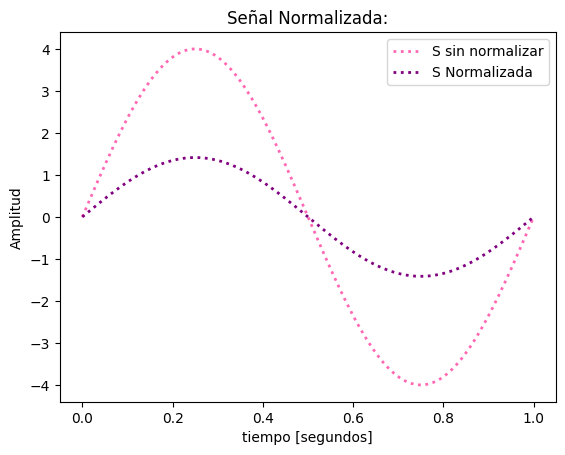

In [2]:
N= 1000
fs = 1000
ff = fs/N
A = 4 #puse cualquier cosa, total luego voy a normalizar
tt, xx = Aps.generador_sen(A, 0, ff, 0, N, fs)
print ('La potencia de mi señal es: ',np.var(xx)) #Ya que por ser una señal senoideal con media cero la potencia es la varianza
xn=xx/np.std(xx) #divido a mi señal por el desvio estandar para normalizarla
print ('Luego de normalizar, la potencia de mi señal es: ',np.var(xn)) #Ya que por ser una señal senoideal con media cero la potencia es la varianza
plt.figure(1)
plt.plot(tt,xx, 'hotpink', linestyle =':', label='S sin normalizar', linewidth=2) 
plt.plot(tt,xn, 'purple', linestyle =':', label='S Normalizada', linewidth=2) 
plt.title("Señal Normalizada:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")
plt.legend(loc='upper right')
plt.show()

### ADC

In [3]:
B =  4# bits
Vf = 2 # rango simétrico de +/- Vf Volts
q = 2*Vf/(2**(B)) # paso de cuantización de q Volts
print('q: ',q)
# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2 ) / 12 # Watts 
kn = 1 # escala de la potencia de ruido analogico
pot_ruido_analog = pot_ruido_cuant * kn 
print('Potencia del ruido analogica: ', pot_ruido_analog)
nn = np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico, su desvio es la raiz de la potencia. (la potencia es la varianza). gaussiano

q:  0.25
Potencia del ruido analogica:  0.005208333333333333


### Cuantizacion

In [4]:
sr = xn + nn # (señal limpia + ruido analogico)
srq = np.round(sr/q)*q # señal cuantizada, (señal divida la cantidad total de bits redondeada, luego escalada por q)
nq =  srq-sr # señal de ruido de la cuantizacion. (el error por discretizar la señal) 

### Visualizacion Temporal

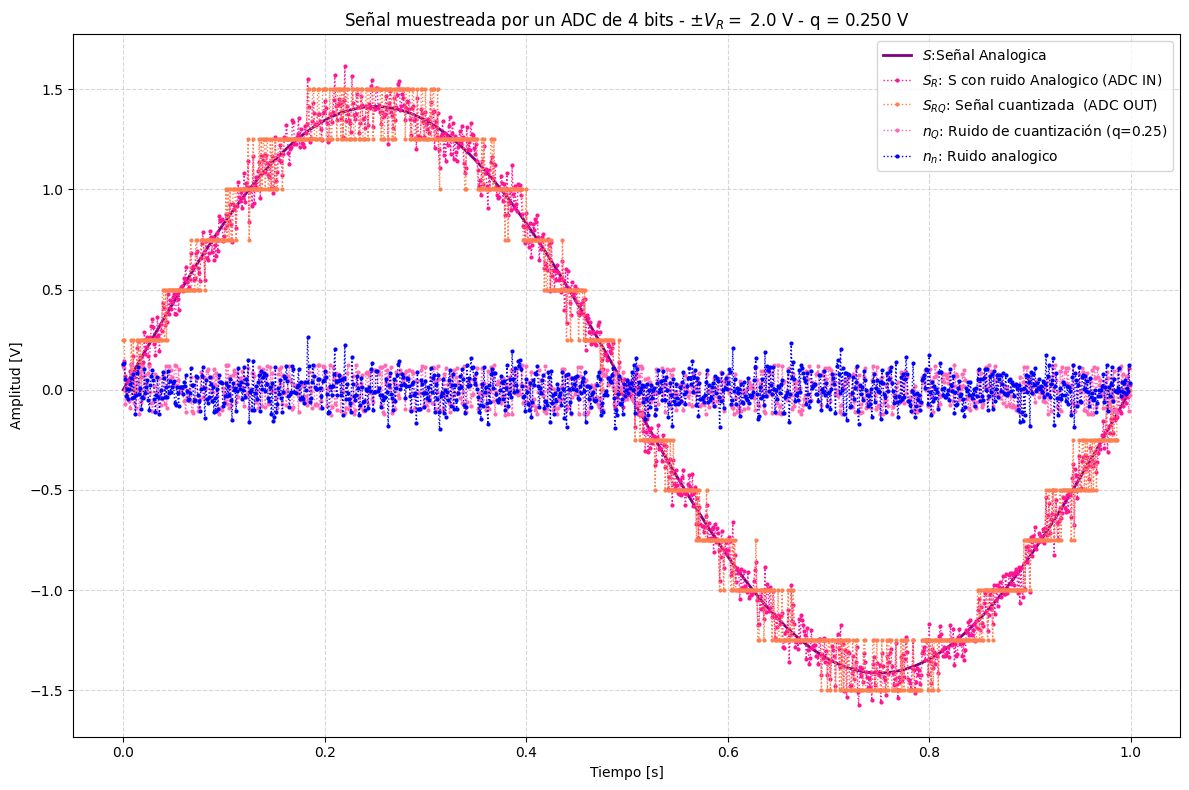

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(tt, xn, 'purple', linestyle ='-', label='$S$:Señal Analogica', linewidth=2)
plt.plot(tt, sr, 'deeppink', label='$S_R$: S con ruido Analogico (ADC IN)',linewidth=1, linestyle=':', marker='o', markersize=2)
plt.plot(tt, srq, 'coral', label='$S_{RQ}$: Señal cuantizada  (ADC OUT)', linewidth=1, linestyle=':', marker='o', markersize=2) 
plt.plot(tt, nq, 'hotpink', label=f'$n_Q$: Ruido de cuantización (q={q:.3})', linewidth=1, linestyle=':', marker='o', markersize=2)
plt.plot(tt, nn, 'blue', label=f'$n_n$: Ruido analogico', linewidth=1,linestyle=':', marker='o', markersize=2)
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Visualizacion Espectral

## FFT de las señales

In [6]:
df = fs/N # resolución espectral: 1hz
ft_SR = 1/N * np.fft.fft(sr)     
ft_Srq = 1/N * np.fft.fft(srq)   
ft_As = 1/N * np.fft.fft(xn)      
ft_Nq = 1/N * np.fft.fft(nq)      
ft_Nn = 1/N * np.fft.fft(nn)     

ff = np.linspace(0, (N-1)*df, N) 
bfrec = ff <= fs/2                 # Mascara para frecuencias  (evita redundancia por simetria de la FFT)
# Calculo la potencia media de los ruidos
Nnq_mean = np.mean(np.abs(ft_Nq)**2)  
nNn_mean = np.mean(np.abs(ft_Nn)**2)  

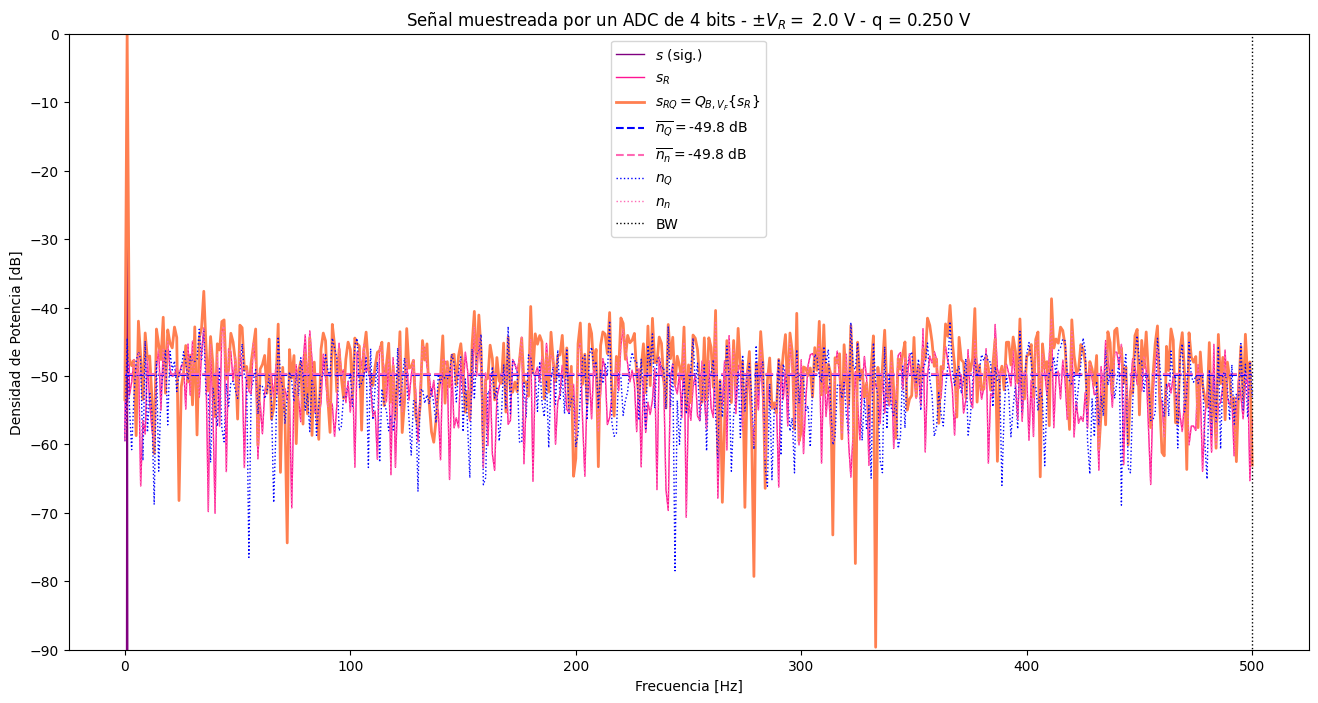

In [7]:
plt.figure(figsize=(16, 8))
#plot de las 3 señales, S , S_R y S_RQ
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='purple', ls='-', label='$ s $ (sig.)', lw = 1 )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), 'deeppink',linestyle = '-', label='$ s_R $' , lw = 1)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), 'coral',lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$' )

#Medias de ruido analogico y de cuantizacion (digital)
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), ls='--',color = 'blue', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), ls='--',color ='hotpink', label= '$ \overline{n_n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )

#Ruido analogico y de cuantizacion (digital)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), 'blue', label='$ n_Q $', lw = 1 ,ls=':')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), 'hotpink', label='$ n_n $', lw = 1 , ls= ':')

plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 1  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(-90,0)
axes_hdl = plt.gca()
axes_hdl.legend()

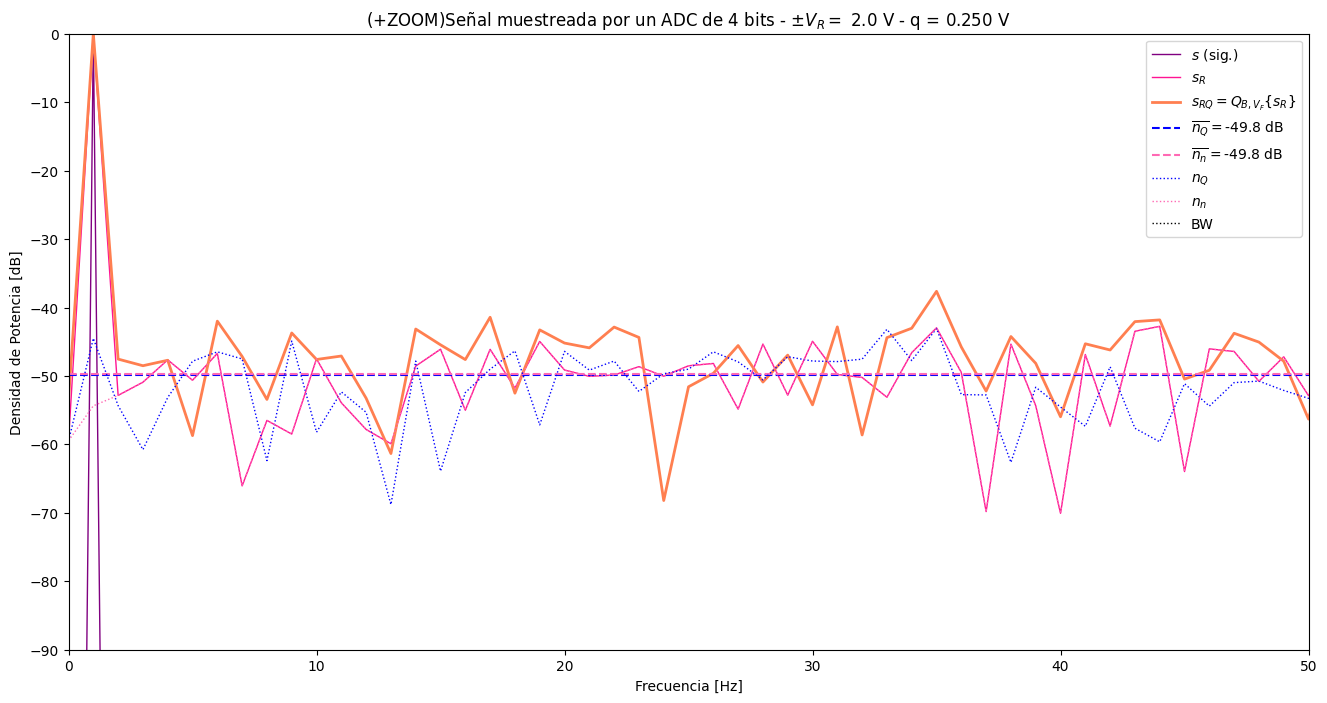

In [8]:
plt.figure(figsize=(16, 8))
#plot de las 3 señales, S , S_R y S_RQ
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='purple', ls='-', label='$ s $ (sig.)', lw = 1 )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), 'deeppink',linestyle = '-', label='$ s_R $' , lw = 1)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), 'coral',lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$' )

#Medias de ruido analogico y de cuantizacion (digital)
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), ls='--',color = 'blue', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), ls='--',color ='hotpink', label= '$ \overline{n_n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )

#Ruido analogico y de cuantizacion (digital)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), 'blue', label='$ n_Q $', lw = 1 ,ls=':')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), 'hotpink', label='$ n_n $', lw = 1 , ls= ':')

plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 1  )

plt.title('(+ZOOM)Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(-90,0)
plt.xlim(0,50)
axes_hdl = plt.gca()
axes_hdl.legend()

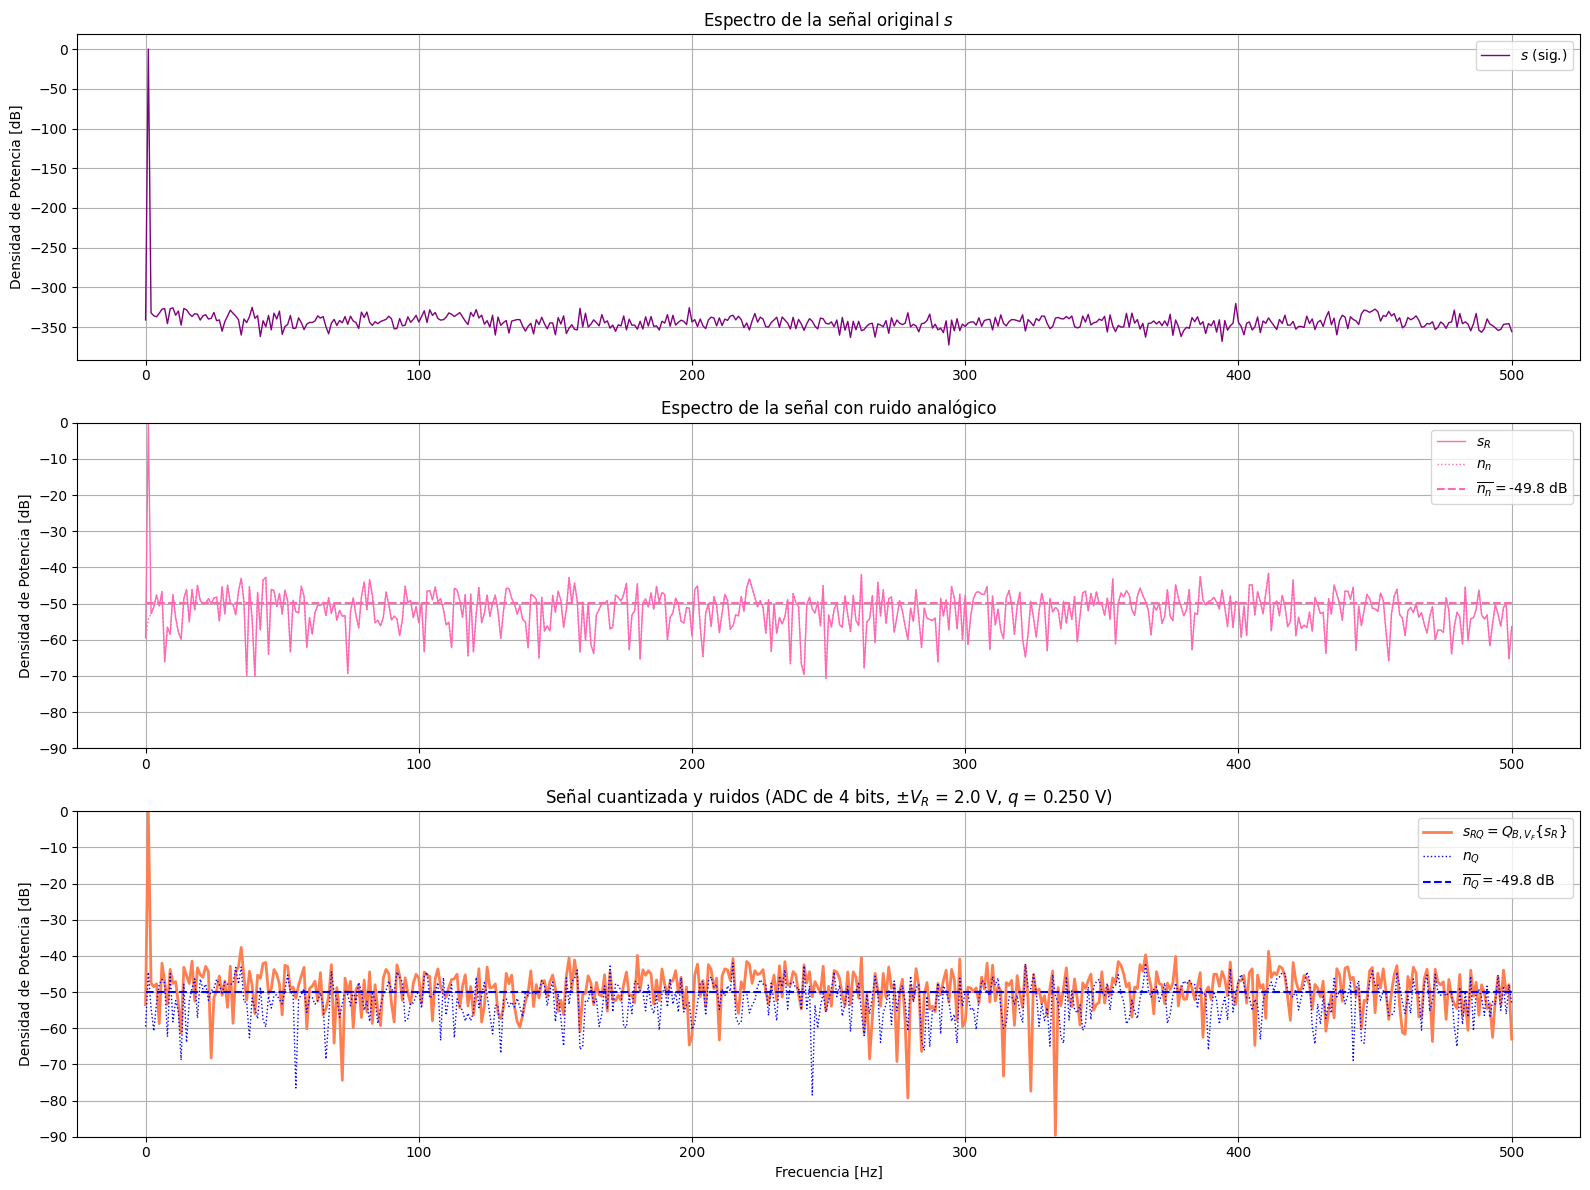

In [9]:
# Creación de la figura con 3 subplots
plt.figure(figsize=(16, 12))

# FFT de la señal original (s) 
plt.subplot(3, 1, 1)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='purple', ls='-', label='$ s $ (sig.)', lw = 1 )
plt.title('Espectro de la señal original $s$')
plt.ylabel('Densidad de Potencia [dB]')
# plt.ylim(-180, 0)
plt.legend()
plt.grid()

#Señal con ruido y ruido analogico
plt.subplot(3, 1, 2)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), 'hotpink',linestyle = '-', label='$ s_R $' , lw = 1)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), 'hotpink', label='$ n_n $', lw = 1 , ls= ':')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), ls='--',color ='hotpink', label= '$ \overline{n_n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )

plt.title('Espectro de la señal con ruido analógico')
plt.ylabel('Densidad de Potencia [dB]')
plt.ylim(-90, 0)
plt.legend()
plt.grid()

#Señal cuantizada y ruidos
plt.subplot(3, 1, 3)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), 'coral',lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), 'blue', label='$ n_Q $', lw = 1 ,ls=':')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), ls='--',color = 'blue', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )

plt.title('Señal cuantizada y ruidos (ADC de {:d} bits, $\pm V_R$ = {:3.1f} V, $q$ = {:3.3f} V)'.format(B, Vf, q))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB]')
plt.ylim(-90, 0)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Histograma

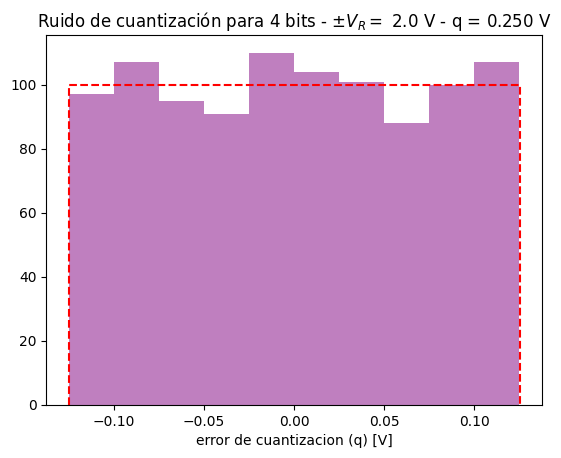

In [10]:
plt.figure()
bins = 10
plt.hist(nq, bins=bins, color='purple', alpha=0.5)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.xlabel('error de cuantizacion (q) [V]')
plt.show()

## Resolucion b.
 Aca hice una funcion (adc_sim) que es una recopilacion de todo el trabajo. Para no sobrecargar codigo y que quede por si volvemos a requerirlo en la materia. 

In [11]:
def adc_sim(xn, B, kn, Vf, N, fs, ymin, ymax, ymin_2):
    q = 2*Vf/(2**(B))
    print('q:',q)
    
    pot_ruido_cuant = (q**2)/12
    pot_ruido_analog = pot_ruido_cuant*kn
    print('Potencia ruido cuant:',pot_ruido_cuant)
    print('Potencia ruido analog:',pot_ruido_analog)

    nn = np.random.normal(0,np.sqrt(pot_ruido_analog),N)
    sr = xn + nn
    srq = np.round(sr/q)*q
    nq = srq-sr

    tt = np.arange(N)/fs

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(tt, xn, 'purple', label='$S$:Señal Analogica', linewidth=1,linestyle='-')
    plt.plot(tt, sr, 'deeppink', label='$S_R$: S con ruido Analogico (ADC IN)', linewidth=1,linestyle=':', marker='o', markersize=2)
    plt.plot(tt, srq, 'coral', label='$S_{RQ}$: Señal cuantizada  (ADC OUT)', linewidth=1,linestyle=':', marker='o', markersize=2) 
    plt.plot(tt, nq, 'hotpink', label=f'$n_Q$: Ruido de cuantización (q={q:.3})', linewidth=1,linestyle=':', marker='o', markersize=2)
    plt.plot(tt, nn, 'blue', label=f'$n_n$: Ruido analogico', linewidth=1, linestyle=':', marker='o', markersize=2)
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Volts')
    plt.legend()
    plt.grid(True,linestyle='--',alpha=0.7)
    plt.tight_layout()
    #plt.show()
    
    #plt.figure(figsize=(8,5))
    plt.subplot(1,2,2)
    bins=10
    plt.hist(nq, bins=bins, color='purple', alpha=0.5)
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
    plt.xlabel('error de cuantizacion (q)')
    plt.tight_layout()
    plt.show()


    df = fs/N
    ft_SR = 1/N*np.fft.fft(sr)
    ft_Srq = 1/N*np.fft.fft(srq)
    ft_As = 1/N*np.fft.fft(xn)
    ft_Nq = 1/N*np.fft.fft(nq)
    ft_Nn = 1/N*np.fft.fft(nn)
    ff = np.linspace(0,(N-1)*df,N)
    bfrec = ff <= fs/2

    Nnq_mean = np.mean(np.abs(ft_Nq[bfrec])**2)
    nNn_mean = np.mean(np.abs(ft_Nn[bfrec])**2)

    plt.figure(figsize=(14,8))
    plt.subplot(2,1,1)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='purple', ls='-', label='$ s $ (sig.)', lw = 1 )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), 'deeppink',linestyle = '-', label='$ s_R $' , lw = 1)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), 'coral',lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), ls='--',color = 'blue', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), ls='--',color ='hotpink', label= '$ \overline{n_n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), 'blue', label='$ n_Q $', lw = 1 ,ls=':')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), 'hotpink', label='$ n_n $', lw = 1 , ls= ':')
    plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 1  )
    plt.title(f'Espectro ADC {B} bits - Vf={Vf}V')
    plt.ylabel('Densidad potencia [dB]')
    plt.xlabel('Freq [Hz]')
    plt.ylim(ymin,ymax)
    plt.legend(loc= 'upper right')
    plt.grid(True,linestyle='--',alpha=0.5)
    #plt.show()

    #plt.figure(figsize=(14,6))
    plt.subplot(2,1,2)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='purple', ls='-', label='$ s $ (sig.)', lw = 1 )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), 'deeppink',linestyle = '-', label='$ s_R $' , lw = 1)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), 'coral',lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), ls='--',color = 'blue', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), ls='--',color ='hotpink', label= '$ \overline{n_n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), 'blue', label='$ n_Q $', lw = 1 ,ls=':')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), 'hotpink', label='$ n_n $', lw = 1 , ls= ':')
    plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 1  )
    plt.title(f'Espectro (zoom) ADC {B} bits - Vf={Vf}V')
    plt.ylabel('Densidad potencia [dB]')
    plt.xlabel('Freq [Hz]')
    plt.ylim(ymin_2,ymax)
    plt.xlim(0,10)
    plt.legend(loc='upper right')
    plt.grid(True,linestyle='--',alpha=0.5)
    plt.tight_layout()
    plt.show()    

#### B = 4 Kn= 1/10
Al tener 4 bits nada mas se ve mucho ruido de cuantización.
Al ser Kn 1/10 la potencia del ruido analogico es menor, el grafico espectral se ve como el piso de ruido del analogico esta debajo del digital.

q: 0.25
Potencia ruido cuant: 0.005208333333333333
Potencia ruido analog: 0.0005208333333333333


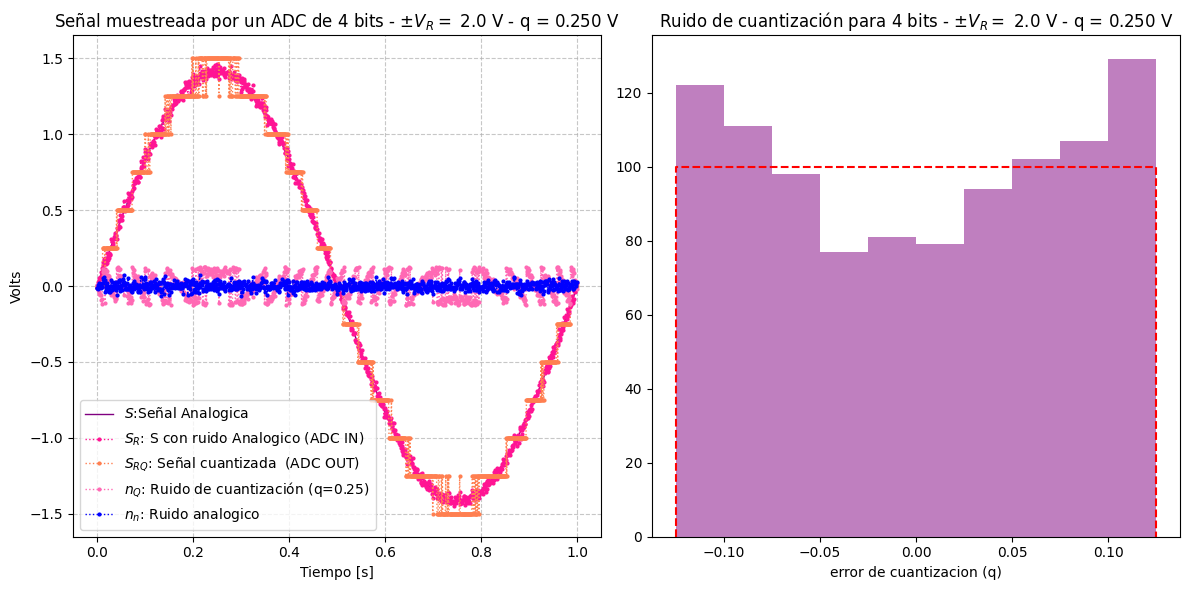

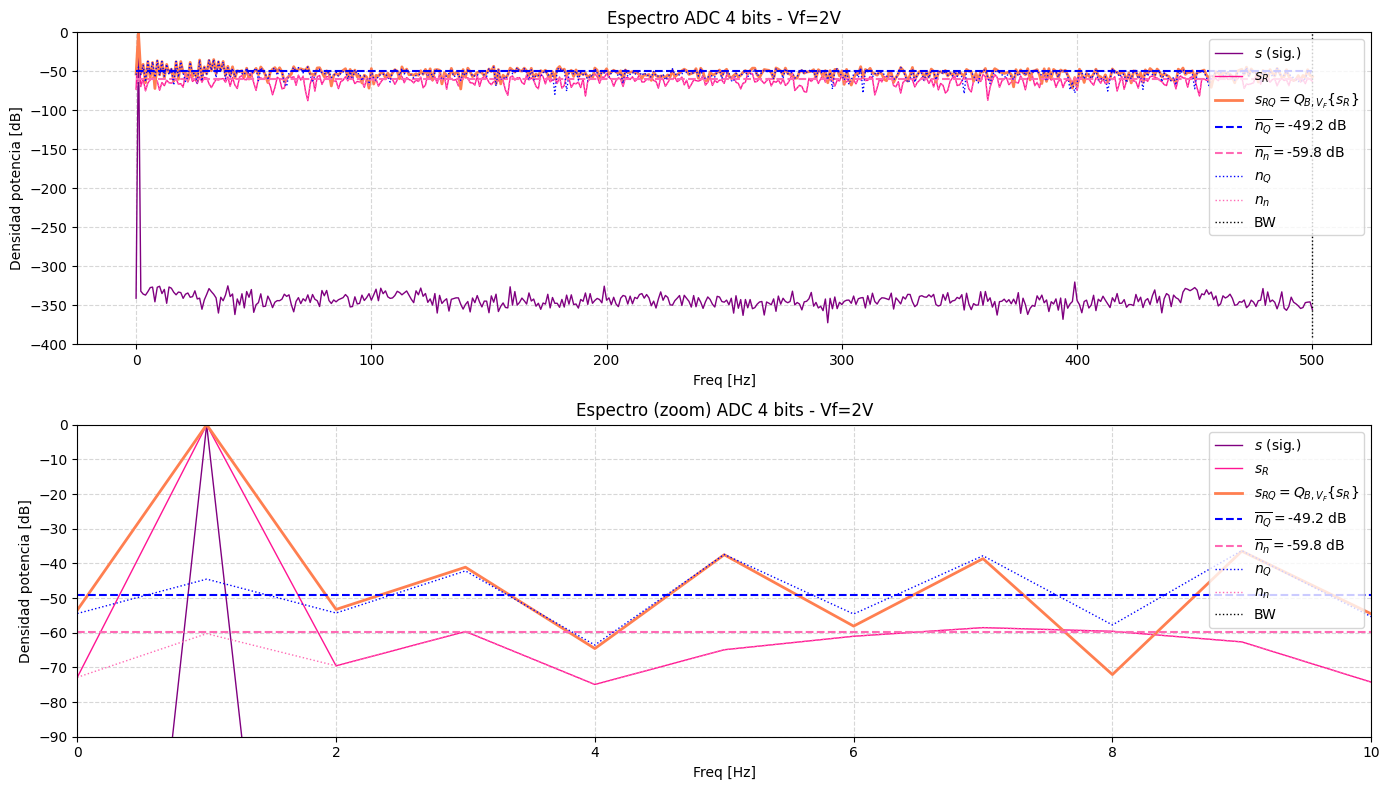

In [12]:
adc_sim(xn, B = 4, kn=1/10, Vf=2, N=1000, fs=1000, ymin=-400, ymax=0, ymin_2=-90)

#### B=8 Kn=1
Al contar con el doble de Bits, ya se ve como en comparacion con el grafico anterior, la señal tiene menor ruido de cuantizacion. 
Al ser kn=1 la potencia del ruido analogica es igual a la de cuantizacion

q: 0.015625
Potencia ruido cuant: 2.0345052083333332e-05
Potencia ruido analog: 2.0345052083333332e-05


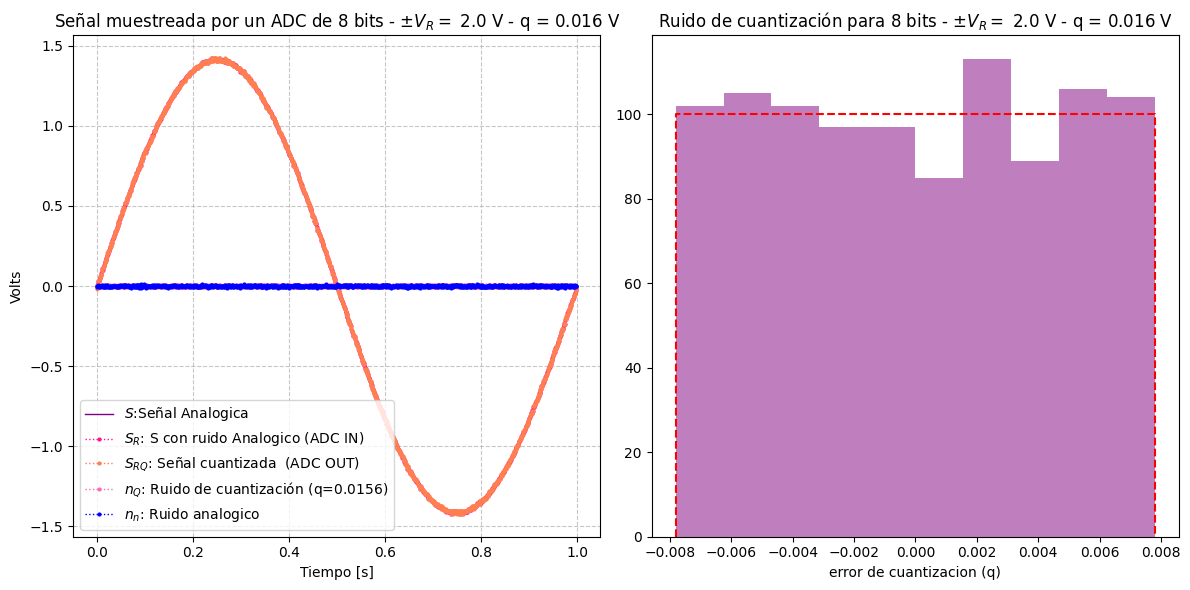

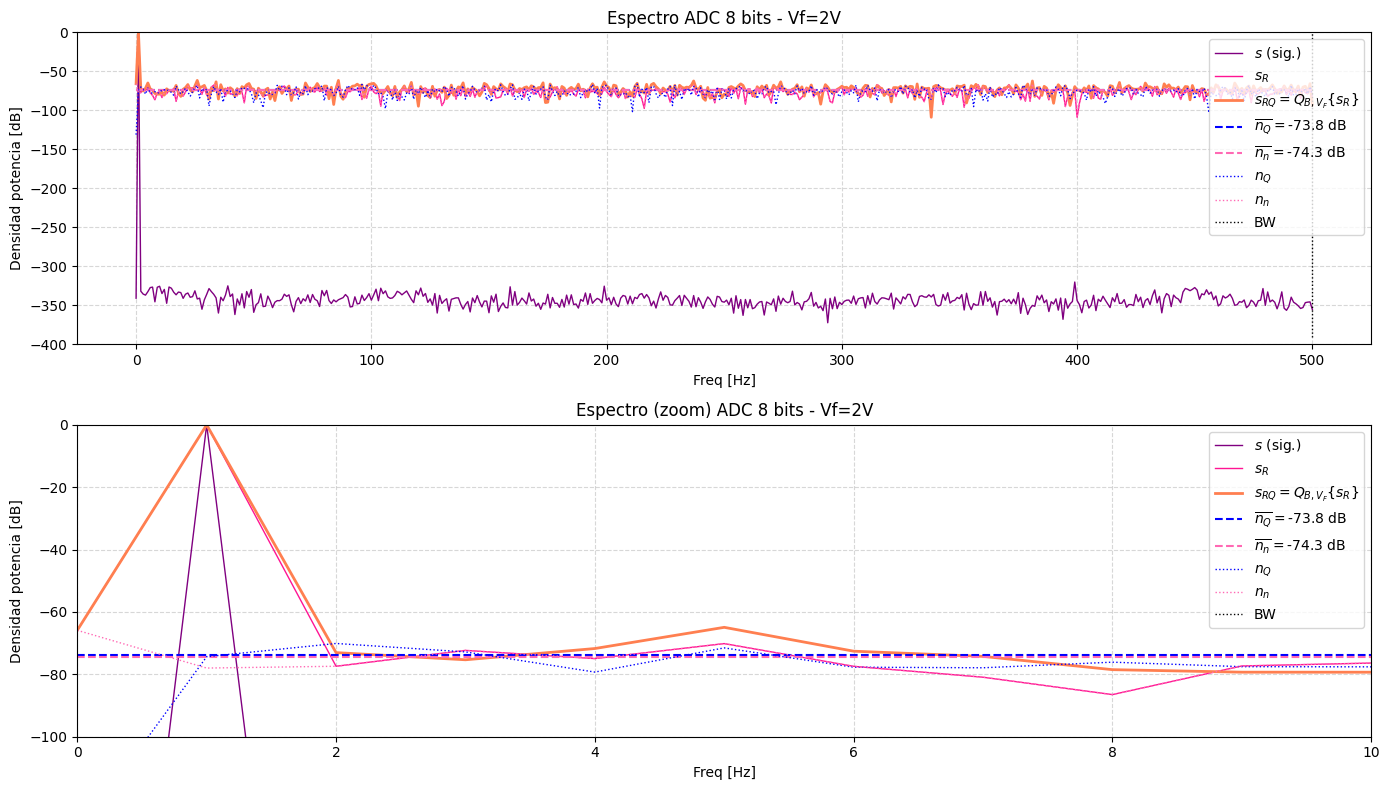

In [13]:
adc_sim(xn, B = 8, kn=1, Vf=2, N=1000, fs=1000, ymin=-400, ymax=0, ymin_2=-100)

#### B=16 Kn=10
Con 16 bits parece como si ni hubiera ruido en la señal muestreada. En el grafico espectral se como los pisos de ruido bajaron aun mas en comparacion con los graficos anteriores. Al ser Kn=10 la potencia del ruido analogica es mayor que la del ruido cuantizado. 

q: 6.103515625e-05
Potencia ruido cuant: 3.104408582051595e-10
Potencia ruido analog: 3.1044085820515948e-09


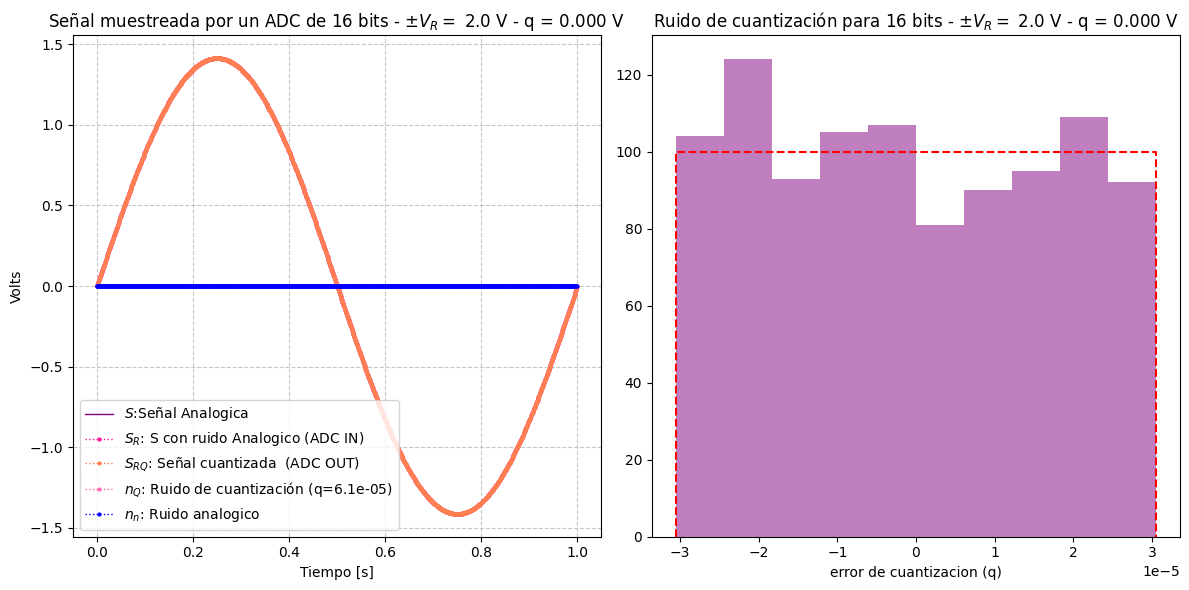

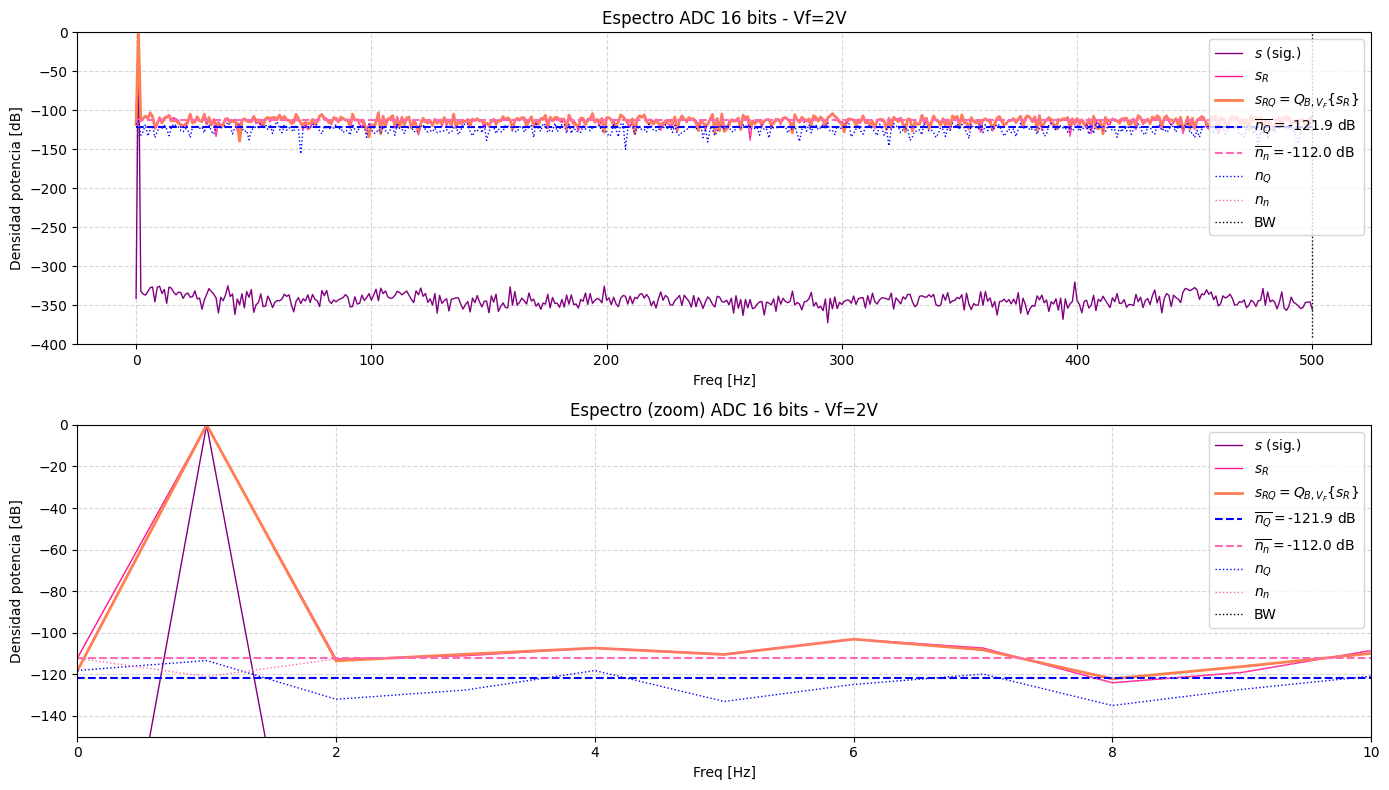

In [14]:
adc_sim(xn, B = 16, kn=10, Vf=2, N=1000, fs=1000, ymin=-400, ymax=0, ymin_2=-150)

## Bonus:

### 1) Simular el efecto del aliasing junto con el muestreo.

Aca lo que se me ocurrio hacer es plotear 3 señales. Las tres senoideales con N=1000 y fs=1000

La primera con frecuencia 1hz (que venimos trabajando)

La segunda con frecuencia 900hz

La tercera con frecuencia 550hz

In [15]:
import random
def plot_espectro(xx, N, fs,ff, color_index):
    
    colormap = plt.get_cmap("tab10")  # También puedes probar 'Set1', 'Paired', 'viridis', etc.
    df = fs / N  
    ft_As = (1 / N) * np.fft.fft(xx) 
    ffx = np.linspace(0, (N - 1) * df, N)  
    bfrec = ffx <= fs / 2  
    random_color = (random.random(), random.random(), random.random())

    plt.plot(ffx[bfrec], 10 * np.log10(2 * np.abs(ft_As[bfrec]) ** 2),
             color=colormap(color_index), ls='solid', label='ff={:.2f} Hz'.format(ff), lw=1)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia (dB)')
    plt.legend()
    plt.grid()

def plot_temporal(xx, ff, tt, color_index):
    colormap = plt.get_cmap("tab10")  # También puedes probar 'Set1', 'Paired', 'viridis', etc.
    plt.plot(tt, xx, color=colormap(color_index), ls='solid', label='ff={:.2f} Hz'.format(ff), linewidth=2)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid()

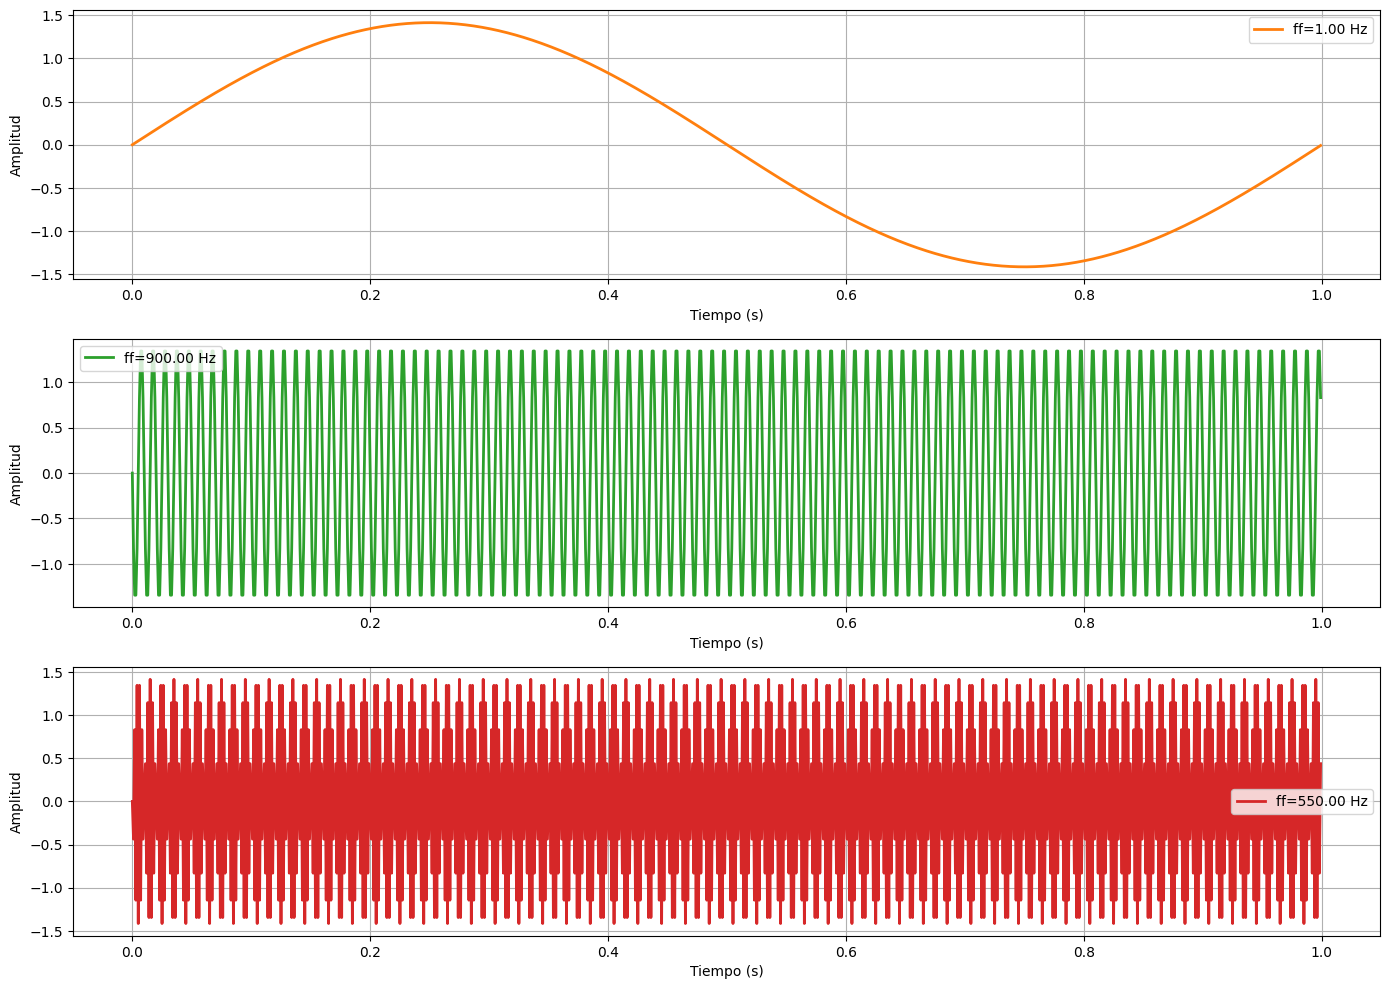

In [16]:
N=1000
fs=1000
ff=1 #sin aliasing cumple nyquist
fa=900 #con aliasing no cumple nyquist
fa_2 = 550 #con aliasing no cumple nyquist

tt,xn= Aps.generador_sen(np.sqrt(2), dc=0, ff= ff, ph=0,nn= N, fs=fs) #Generador de senoidal ideal
tt_1,xn1= Aps.generador_sen(np.sqrt(2), dc=0, ff= fa, ph=0,nn= N, fs=fs) #Generador de senoidal 
tt_2,xn2= Aps.generador_sen(np.sqrt(2), dc=0, ff= fa_2, ph=0,nn= N, fs=fs) #Generador de senoidal ideal
plt.figure(figsize=(14, 10))
plt.subplot(3,1,1)
plot_temporal(xn, ff=ff, tt=tt, color_index=1)
plt.subplot(3,1,2)
plot_temporal(xn1, ff=fa, tt=tt_1, color_index=2)
plt.subplot(3,1,3)
plot_temporal(xn2, ff=fa_2, tt=tt_2, color_index=3)
plt.tight_layout()
plt.show()

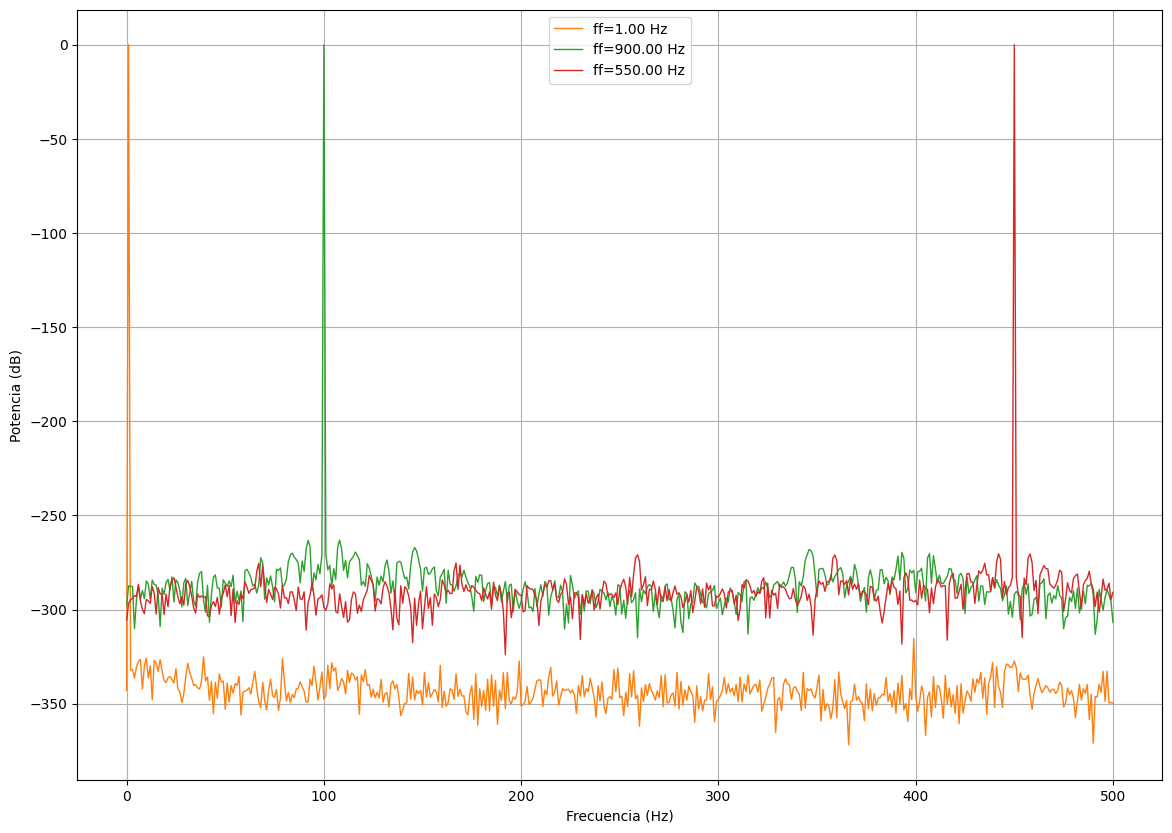

In [17]:
plt.figure(figsize=(14, 10))
plot_espectro(xn, N=N, fs=fs, ff=ff  , color_index= 1 )
plot_espectro(xn1, N=N,fs=fs,ff=fa, color_index=2)
plot_espectro(xn2, N=N,fs=fs,ff=fa_2, color_index=3)
plt.show()

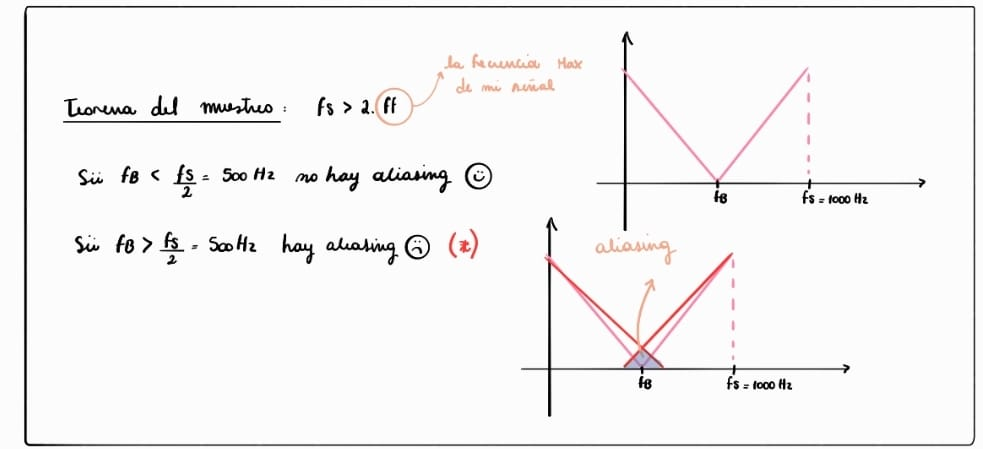

In [18]:
from IPython.display import Image; 
Image(filename="C:/Users/Notebook/Downloads/WhatsApp Image 2025-04-03 at 12.37.03 (1).jpeg")

Conclusiones de la simulacion que hice:
Mi idea era mostrar como para para frecuencias que si cumplen el teorema del muestreo (osea la señal de 1hz) en el grafico espectral se ve perfecto en 1hz su pico y no hay aliasing. 

Sin embargo, para por ejemplo la señal de 900hz, se ve que su pido se encuentra en 100hz ¿por que es eso? por que $f(aliasing) = |ff- f_s . k|$
$ k $ es un numero entero que representa cuantos ciclos de la frecuencia de muestreo $ f_s $ deben restarse de la frecuencia original $ ff $ para que la frecuencia observada se pliegue dentro del rango de frecuencias permitidas, $ [0, f_s/2] $ 

En el caso de $ff=900$ se ve en el grafico temporal como si fuese una señal de 100hz (*) y en el espectral se ve ahi su pico. no solo el pico no se donde 'corresponde' si no que se ve como un "piso" mayor producto de la superposicion. 

(*) prueba de que se ve como una señal de 100hz:


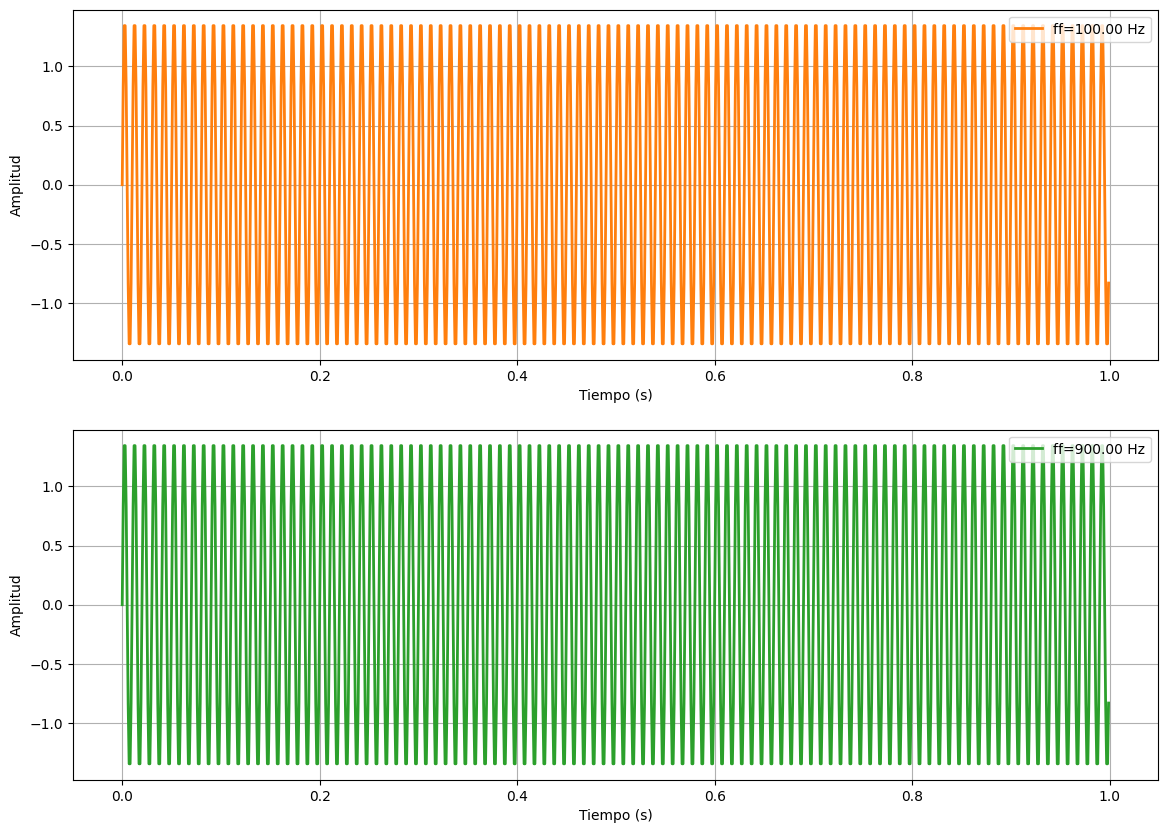

In [19]:
N=1000
fs=1000
ff=100 
ff_2=900 
tt,xn= Aps.generador_sen(np.sqrt(2), dc=0, ff= ff, ph=0,nn= N, fs=fs) #Generador de senoidal ideal
tt_1,xn1= Aps.generador_sen(np.sqrt(2), dc=0, ff= ff_2, ph=0,nn= N, fs=fs) #Generador de senoidal 
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plot_temporal(xn, ff=ff, tt=tt, color_index=1)
plt.subplot(2,1,2)
plot_temporal(xn, ff=ff_2, tt=tt, color_index=2)
plt.show()

En el caso de la señal de 550 sucede algo similar que para la de 900hz. Al no cumplir con el teorema de muestreo, el pico en el espectro de potencia se ve en 450hz en vez de 550 hz. y ademas se ve como el piso de la señal se incremeda por el aliasing.

### Encontrar la relación entre la cantidad de B bits del ADC y el SNR de la señal digitalizada. (Ver Holton. DSP Principles and App. 6.7 ADC Quantization pag. 387 )


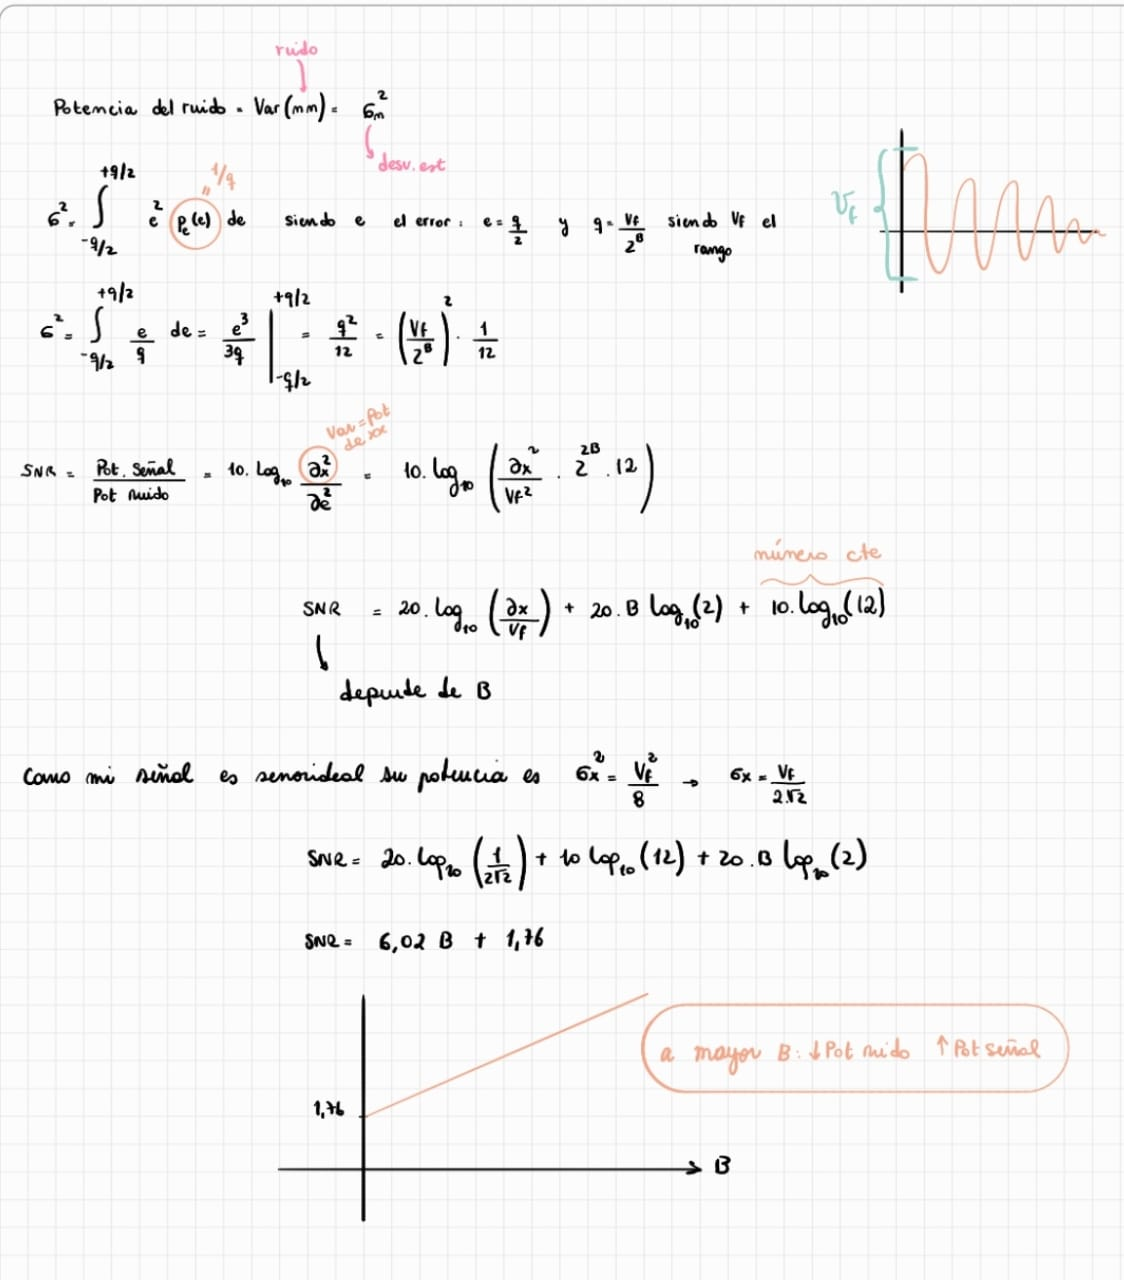

In [20]:
Image(filename="C:/Users/Notebook/Downloads/WhatsApp Image 2025-04-03 at 13.48.14 (1).jpeg")

In [21]:
#fin